The goal here is to define a modified WFD footprint to forward to the OpSim team for them to run the full cadence realization. This will allow us access to a more realistic realization of the coadded depth, instead of just using the wider-footprint cadence, `pontun_2002` to gauge the effectiveness of a modified WFD survey.

To define the footprint, we implement an extinction cut (discarding areas with E(B-V)>0.2) in order to get rid of the survey area that is not usable for extragalactic science. We look at the footprint with per night translational dithers. Here're the numbers for the final footprint (from Output 3):

#### pontus_2002 stats: RandomDitherPerNight: final cuts: EBV<0.2
| - | 1yr_u | 1yr_g | 1yr_r | 1yr_i | 1yr_z | 1yr_y 
| ---- | ---- | ---- | ---- | ---- | ---- | ---- 
| 5$\sigma$ Depth: Median | 23.86 | 25.37 | 25.59 | 24.83 | 24.59 | 23.65 
| 5$\sigma$ Depth: Std | 0.45 | 0.44 | 0.32 | 0.37 | 0.24 | 0.22 
| Area (deg2) | 19227.80 | 19227.80 | 19227.80 | 19227.80 | 19227.80 | 19227.80 

| - | 10yr_u | 10yr_g | 10yr_r | 10yr_i | 10yr_z | 10yr_y 
| ---- | ---- | ---- | ---- | ---- | ---- | ---- 
| 5$\sigma$ Depth: Median | 25.19 | 26.75 | 26.89 | 26.37 | 25.52 | 24.73 
| 5$\sigma$ Depth: Std | 0.38 | 0.33 | 0.29 | 0.27 | 0.27 | 0.29 
| Area (deg2) | 20668.76 | 20668.76 | 20668.76 | 20668.76 | 20668.76 | 20668.76 

The cut leaves us with rather modest area that is usable for extragalactic science (as opposed to the baseline; see [here](https://docs.google.com/presentation/d/19nHxuebIcCdyx_M-MdZCD4fW56XAJnkVeNaswoBDEAs/edit?usp=sharing) for some numbers).

Since we are not implementing a depth cut, we see that the final footprint with just an EBV cut includes the shallow-depth border that is a consequene of the current implementation of translational dithers (work is underway to fix this). To circumvent this problem for now, we look at the final footprint with the same EBV cut but now with undithered pointings. Here's the final footprint info from Output 4:

#### pontus_2002 stats: NoDither: final cuts: EBV<0.2
| - | 1yr_u | 1yr_g | 1yr_r | 1yr_i | 1yr_z | 1yr_y 
| ---- | ---- | ---- | ---- | ---- | ---- | ---- 
| 5$\sigma$ Depth: Median | 23.84 | 25.35 | 25.56 | 24.80 | 24.55 | 23.60 
| 5$\sigma$ Depth: Std | 0.46 | 0.43 | 0.33 | 0.38 | 0.27 | 0.26 
| Area (deg2) | 19255.28 | 19255.28 | 19255.28 | 19255.28 | 19255.28 | 19255.28 

| - | 10yr_u | 10yr_g | 10yr_r | 10yr_i | 10yr_z | 10yr_y 
| ---- | ---- | ---- | ---- | ---- | ---- | ---- 
| 5$\sigma$ Depth: Median | 25.15 | 26.70 | 26.84 | 26.32 | 25.46 | 24.67 
| 5$\sigma$ Depth: Std | 0.33 | 0.29 | 0.25 | 0.23 | 0.23 | 0.23 
| Area (deg2) | 20183.65 | 20183.65 | 20183.65 | 20183.65 | 20183.65 | 20183.65 

Since the undithered survey effectively circumvent the inclusion of the shallow-depth border, it should work for our purposes.  We will be post-processing the OpSim output to add dithers, so the worse overall depth statistics from the undithered survey should not matter.

This notebook runs the code that implements the ebv-cut for the dithered and undithered survey (for which the final footprint info is saved as a pickle file). The final cell reads in the saved pickle file to ensure that the pixel numbers are working.

#### The footprint file, `10yrFootprint_pontus_2002_nside256_NoDither_ebv<0.2.pickle`, is in `/global/homes/a/awan/desc/wfd_footprint/`

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
!python implement_ebv_cut_only.py --help

Usage: implement_ebv_cut_only.py [options]

Options:
  -h, --help            show this help message and exit
  --nside=NSIDE         HEALPix resolution parameter.
  --db_path=DB_PATH     Path to OpSim db to consider.
  --coadd_data_dir=COADD_DATA_DIR
                        Path to the folder where coadd depth maps are; coadd
                        data with dust extinction and no border masking must
                        exist already.
  --save_pixels_fIDs    Set to True if want to save the pixel numbers and the
                        corresponding fieldIDs for the final footprint.
  --outDir=OUTDIR       Path to the folder where all the output should be
                        stored


**Run the analysis for dithered pointings.**

/global/common/software/lsst/common/miniconda/py3-4.3.21-env/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)



Options: {'nside': 256, 'db_path': '/global/cscratch1/sd/awan/dbs_wp_unzipped/pontus_2002.db', 'coadd_data_dir': '/global/cscratch1/sd/awan/lsst_output/coadd_output_allwps_perNight/', 'save_pixels_fIDs': True, 'outDir': '/global/homes/a/awan/desc/wfd_footprint/'}

data_dir: /global/cscratch1/sd/awan/lsst_output/coadd_output_allwps_perNight/
dbname: pontus_2002
nside: 256

ebv_limit: 0.2

## Reading in the data ... 

Reading ['coaddM5Data_unmasked_u_RandomDitherPerNight.npz'] from
coaddM5Analysis_nside256_withDustExtinction_0pixelRadiusForMasking_uBand_pontus_2002_1yearCut_directory//maskedCoaddData.

Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Reading ['coaddM5Data_unmasked_g_RandomDitherPerNight.npz'] from
coaddM5Analysis_nside256_withDustExtinction_0pixelRadiusForMasking_gBand_pontus_2002_1yearCut_directory//maskedCoaddData.

Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Reading ['coaddM5Data_unmasked_r_RandomDitherPerNig

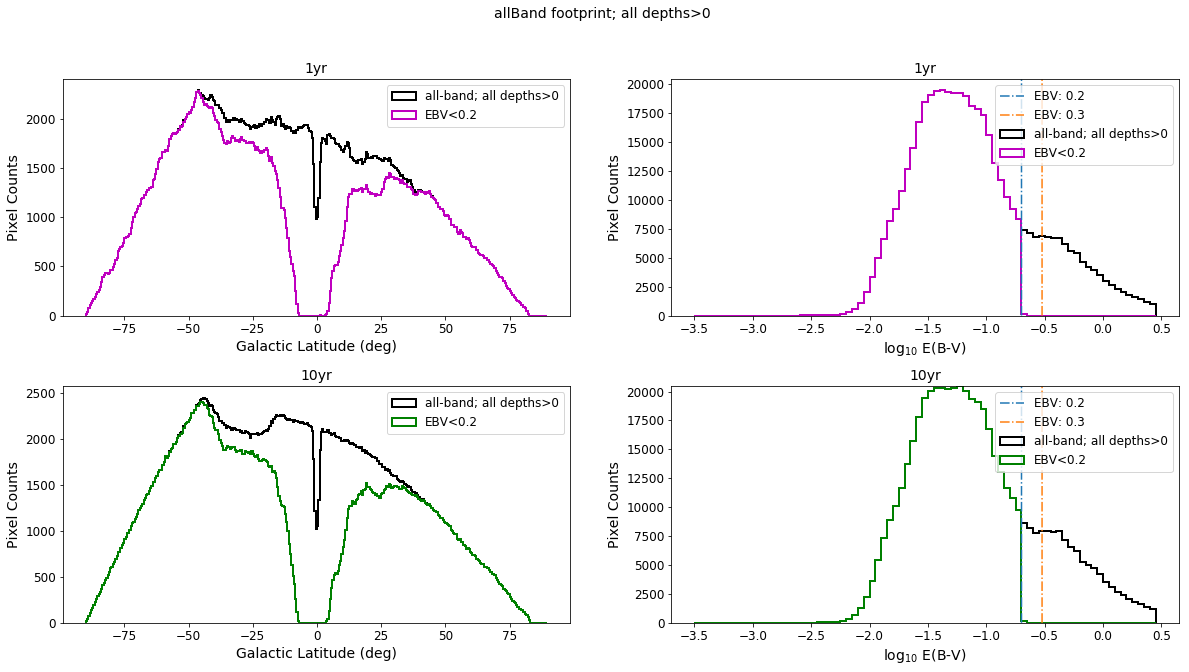

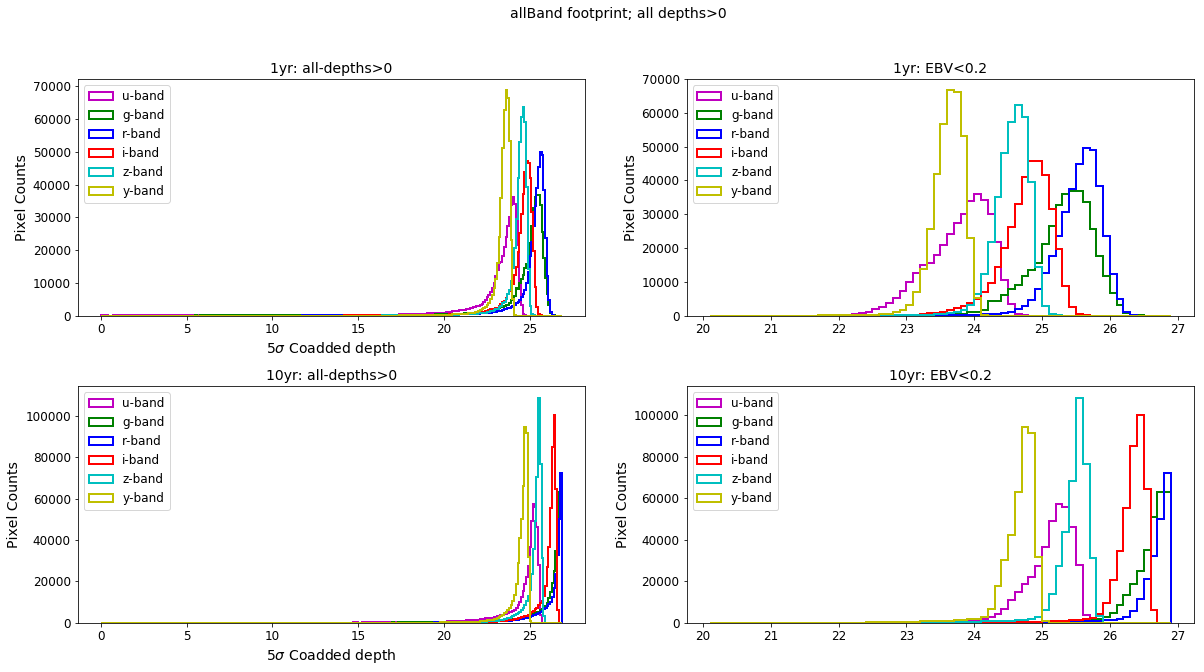

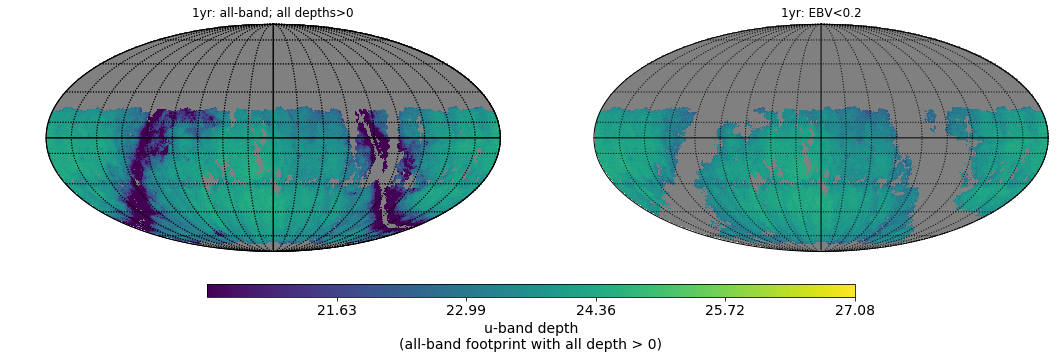

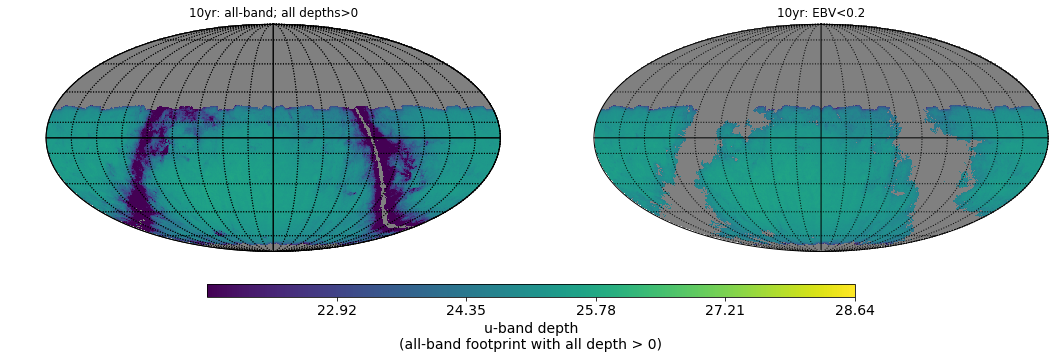

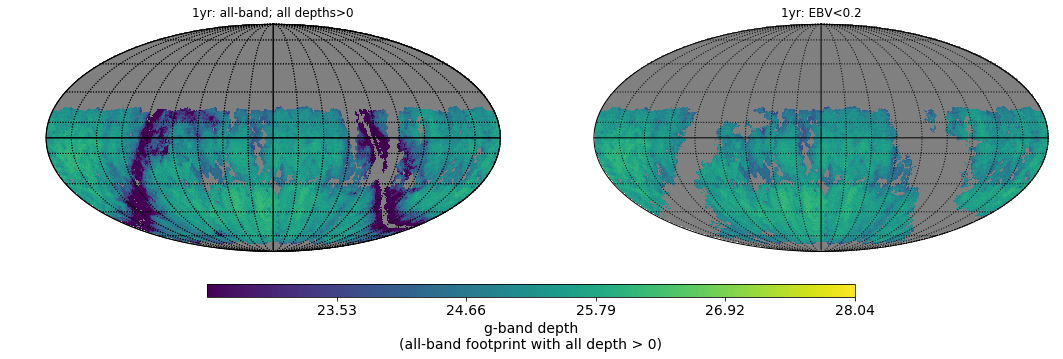

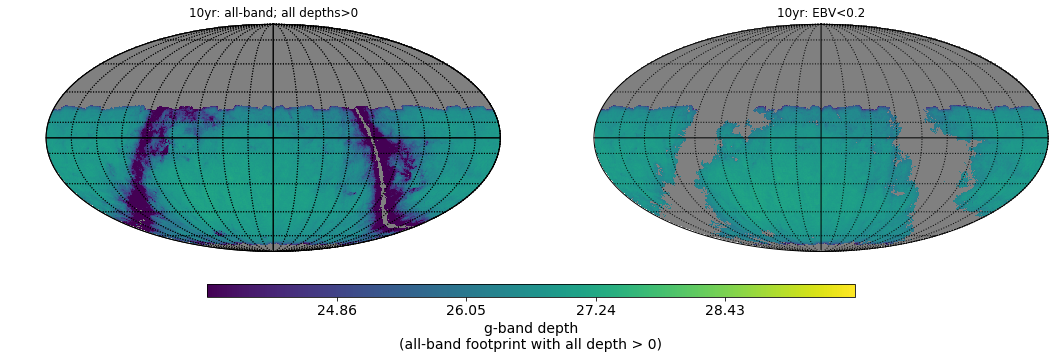

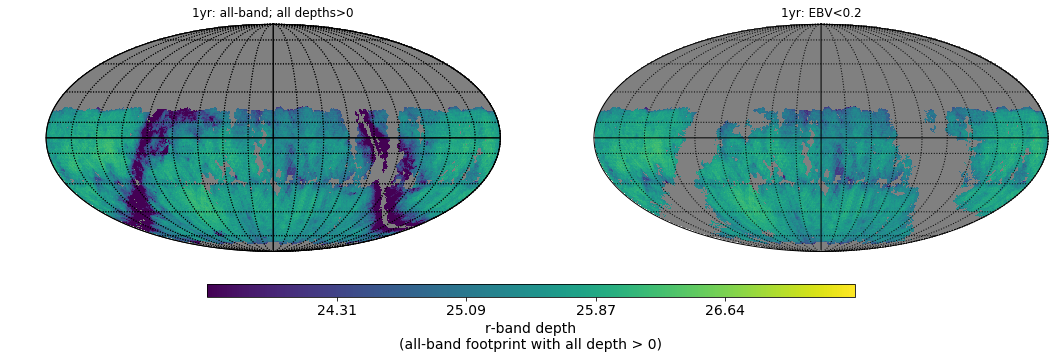

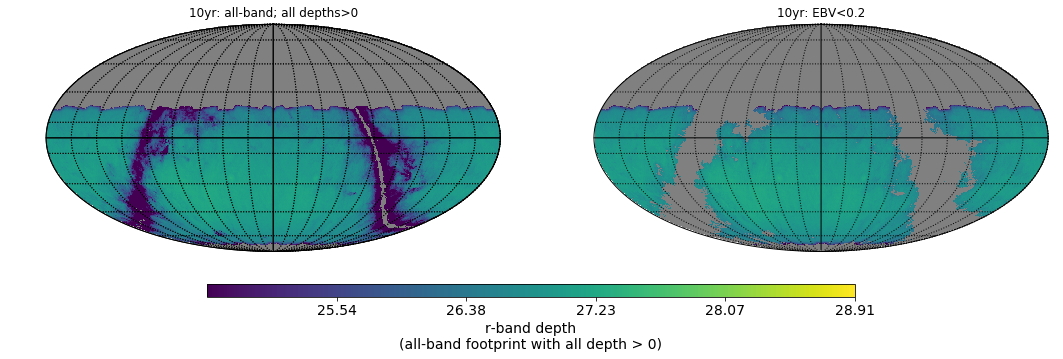

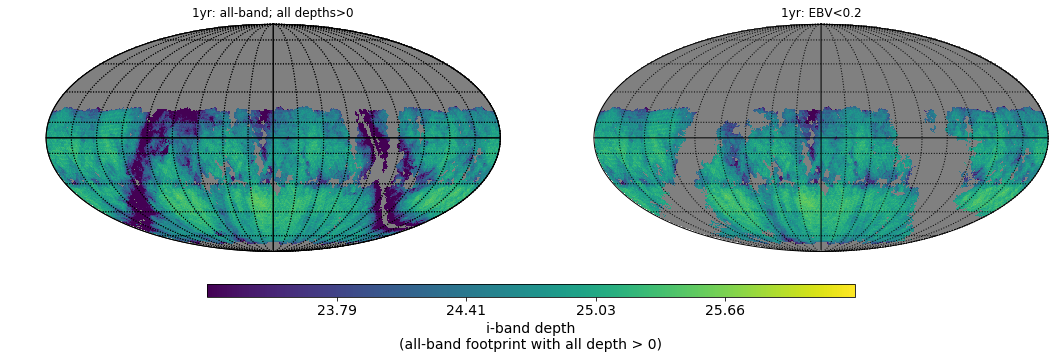

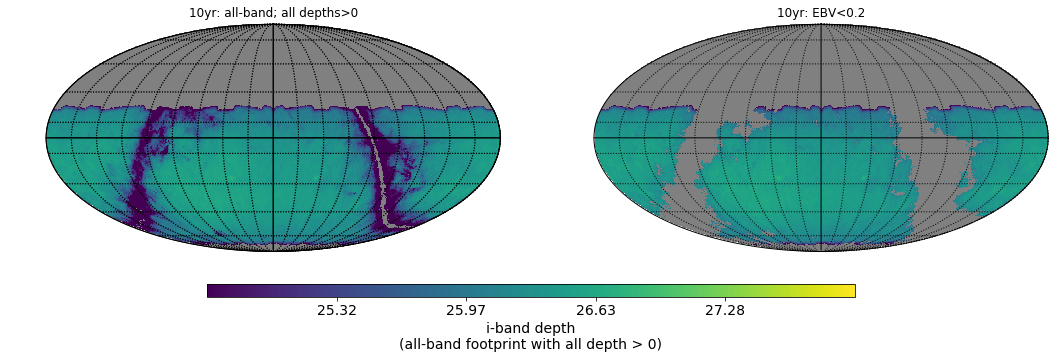

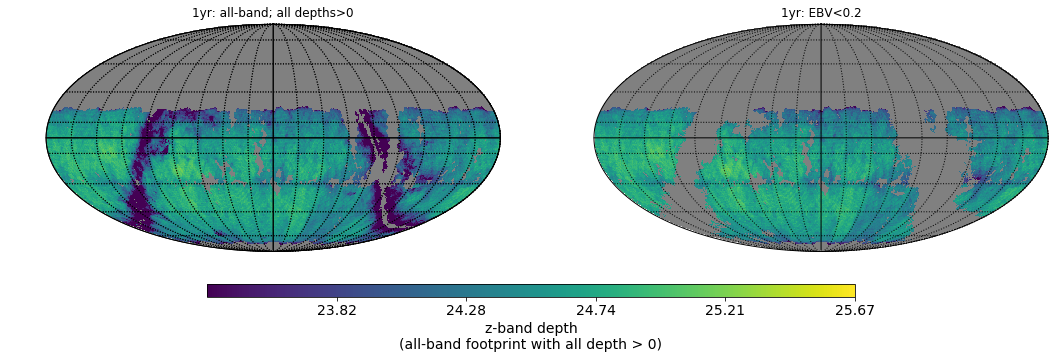

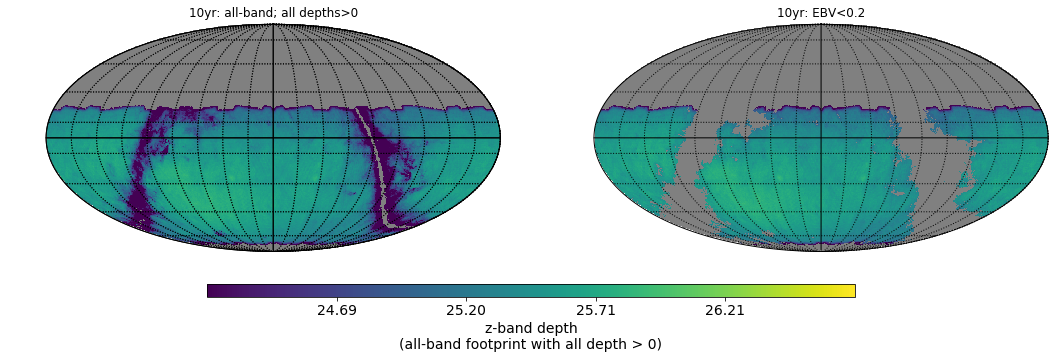

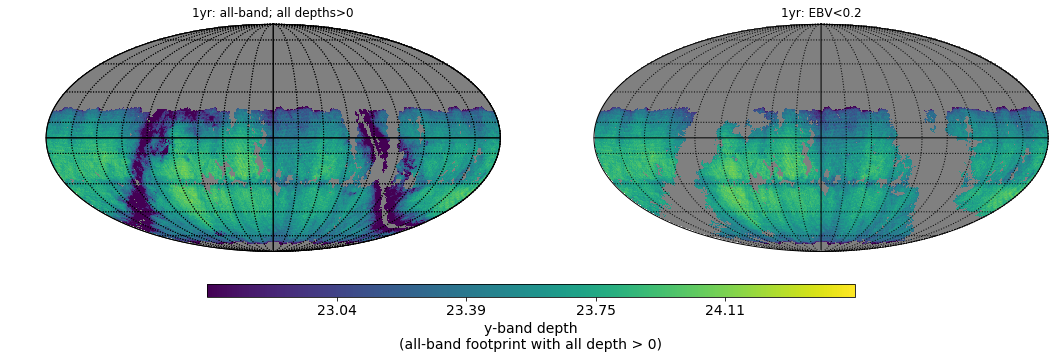

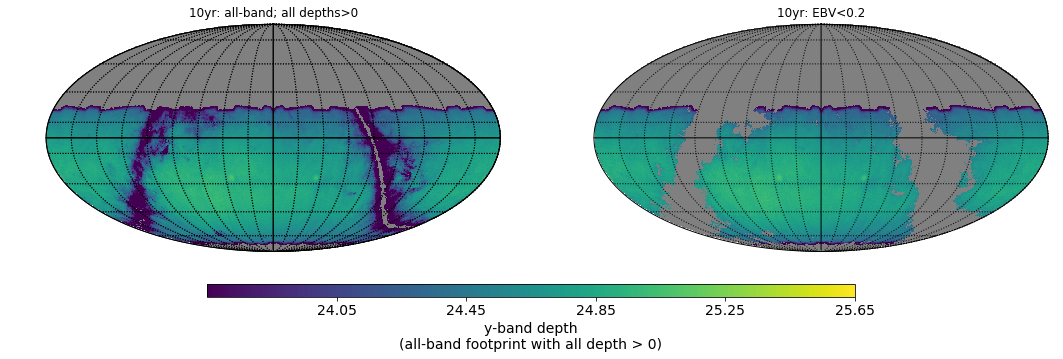


## Saved 10yrFootprint_pontus_2002_nside256_RandomDitherPerNight_ebv<0.2.pickle in /global/homes/a/awan/desc/wfd_footprint/.

CPU times: user 6min 40s, sys: 22.4 s, total: 7min 2s
Wall time: 7min 4s


In [3]:
%%time
%run implement_ebv_cut_only.py --coadd_data_dir='/global/cscratch1/sd/awan/lsst_output/coadd_output_allwps_perNight/' \
                                --save_pixels_fIDs --outDir='/global/homes/a/awan/desc/wfd_footprint/'

Okay good. The EBV cut is getting rid of the high-extinction footprint. However, it leaves the shallow-depth border in the final footprint (a consequence of the translational dithers rn).

**Run the analysis for undithered pointings.**


Options: {'nside': 256, 'db_path': '/global/cscratch1/sd/awan/dbs_wp_unzipped/pontus_2002.db', 'coadd_data_dir': '/global/cscratch1/sd/awan/lsst_output/coadd_output_noDith/', 'save_pixels_fIDs': True, 'outDir': '/global/homes/a/awan/desc/wfd_footprint/'}

data_dir: /global/cscratch1/sd/awan/lsst_output/coadd_output_noDith/
dbname: pontus_2002
nside: 256

ebv_limit: 0.2

## Reading in the data ... 

Reading ['coaddM5Data_unmasked_u_NoDither.npz'] from
coaddM5Analysis_nside256_withDustExtinction_0pixelRadiusForMasking_uBand_pontus_2002_1yearCut_directory//maskedCoaddData.



/global/common/software/lsst/common/miniconda/py3-4.3.21-env/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Reading ['coaddM5Data_unmasked_g_NoDither.npz'] from
coaddM5Analysis_nside256_withDustExtinction_0pixelRadiusForMasking_gBand_pontus_2002_1yearCut_directory//maskedCoaddData.

Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Reading ['coaddM5Data_unmasked_r_NoDither.npz'] from
coaddM5Analysis_nside256_withDustExtinction_0pixelRadiusForMasking_rBand_pontus_2002_1yearCut_directory//maskedCoaddData.

Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Reading ['coaddM5Data_unmasked_i_NoDither.npz'] from
coaddM5Analysis_nside256_withDustExtinction_0pixelRadiusForMasking_iBand_pontus_2002_1yearCut_directory//maskedCoaddData.

Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Reading ['coaddM5Data_unmasked_z_NoDither.npz'] from
coaddM5Analysis_nside256_withDustExtinction_0pixelRadiusForMasking_zBand_pontus_2002_1yearCut_directory//maskedCoad

/global/u2/a/awan/LSST/lsstRepos/ObsStrat/code/modifyWFD/implement_ebv_cut_only.py:103: RuntimeWarning: invalid value encountered in greater
  (data_bundle[yr_cut].metricValues.data > 0))[0]


g-band: improvement factor in flux: 3.66184444939
r-band: improvement factor in flux: 3.39209814142
i-band: improvement factor in flux: 4.31431109437
z-band: improvement factor in flux: 2.39678067949
y-band: improvement factor in flux: 2.72613236325
Wanted improvement factor over ten years: 3.16227766017
Mean improvement factor across ugrizy: 3.33642130455

#### Stats: no constraints on depth, i.e., even have negative depths
| - | 1yr_u | 1yr_g | 1yr_r | 1yr_i | 1yr_z | 1yr_y 
| ---- | ---- | ---- | ---- | ---- | ---- | ---- 
| 5$\sigma$ Depth: Median | 23.65 | 25.18 | 25.42 | 24.66 | 24.45 | 23.51 
| 5$\sigma$ Depth: Std | 7.36 | 6.38 | 4.63 | 3.59 | 2.72 | 2.06 
| Area (deg2) | 25605.22 | 25819.40 | 26462.25 | 26398.15 | 26494.09 | 26494.09 

| - | 10yr_u | 10yr_g | 10yr_r | 10yr_i | 10yr_z | 10yr_y 
| ---- | ---- | ---- | ---- | ---- | ---- | ---- 
| 5$\sigma$ Depth: Median | 25.02 | 26.59 | 26.75 | 26.24 | 25.40 | 24.60 
| 5$\sigma$ Depth: Std | 7.94 | 6.61 | 4.63 | 3.57 | 2.72 | 2

/global/u2/a/awan/LSST/lsstRepos/ObsStrat/code/modifyWFD/implement_ebv_cut_only.py:179: RuntimeWarning: invalid value encountered in greater
  (data_bundle[key].metricValues.data > 0))[0]



#### Stats: considering area common to all-6 bands with depths>0 in all
| - | 1yr_u | 1yr_g | 1yr_r | 1yr_i | 1yr_z | 1yr_y 
| ---- | ---- | ---- | ---- | ---- | ---- | ---- 
| 5$\sigma$ Depth: Median | 23.65 | 25.21 | 25.45 | 24.69 | 24.47 | 23.53 
| 5$\sigma$ Depth: Std | 2.30 | 1.90 | 1.31 | 1.05 | 0.79 | 0.62 
| Area (deg2) | 24631.54 | 24631.54 | 24631.54 | 24631.54 | 24631.54 | 24631.54 

| - | 10yr_u | 10yr_g | 10yr_r | 10yr_i | 10yr_z | 10yr_y 
| ---- | ---- | ---- | ---- | ---- | ---- | ---- 
| 5$\sigma$ Depth: Median | 25.03 | 26.60 | 26.75 | 26.25 | 25.40 | 24.60 
| 5$\sigma$ Depth: Std | 2.39 | 1.99 | 1.40 | 1.08 | 0.83 | 0.65 
| Area (deg2) | 26248.23 | 26248.23 | 26248.23 | 26248.23 | 26248.23 | 26248.23 

Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
#################################################################################################################
###############################################################################

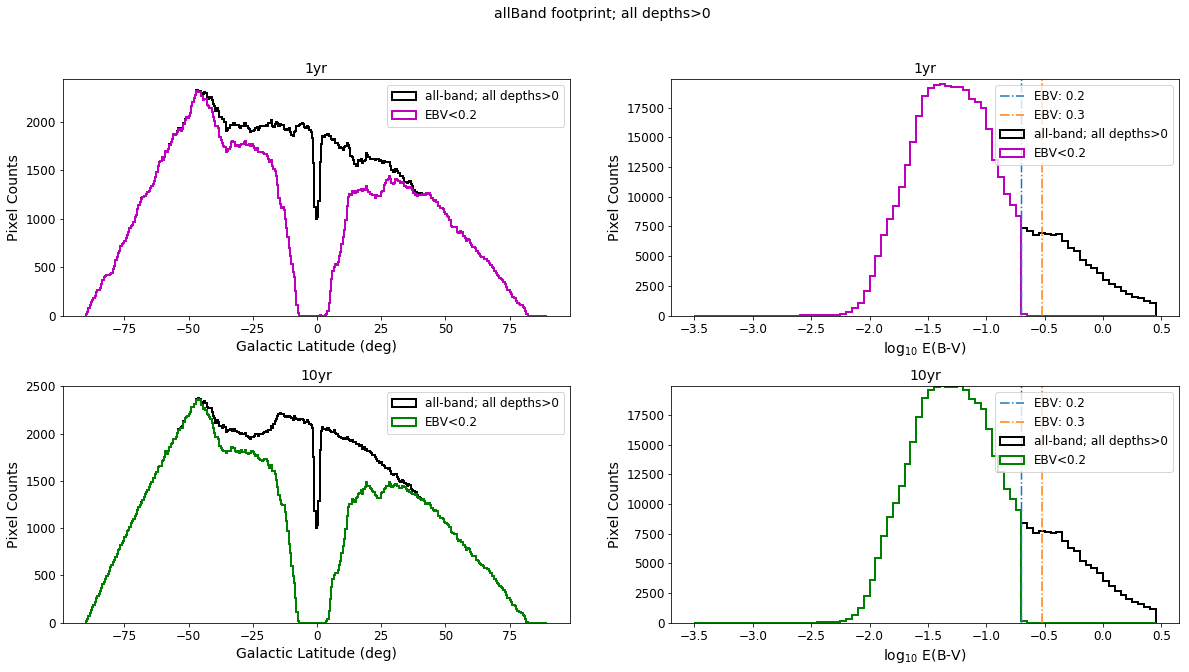

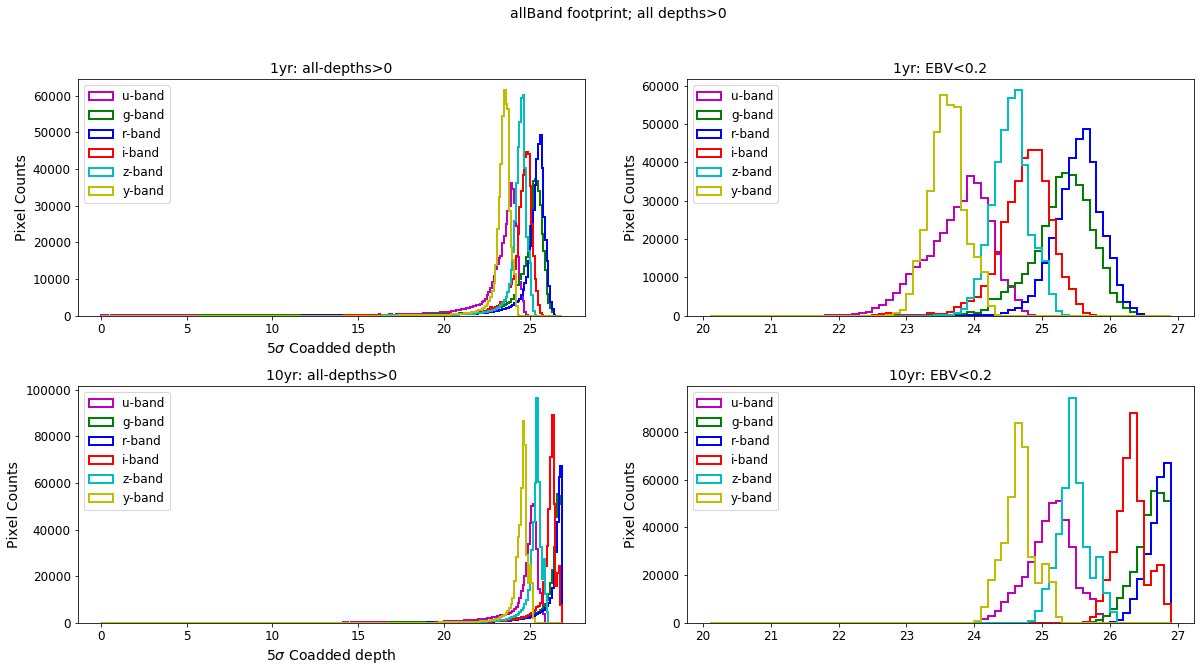

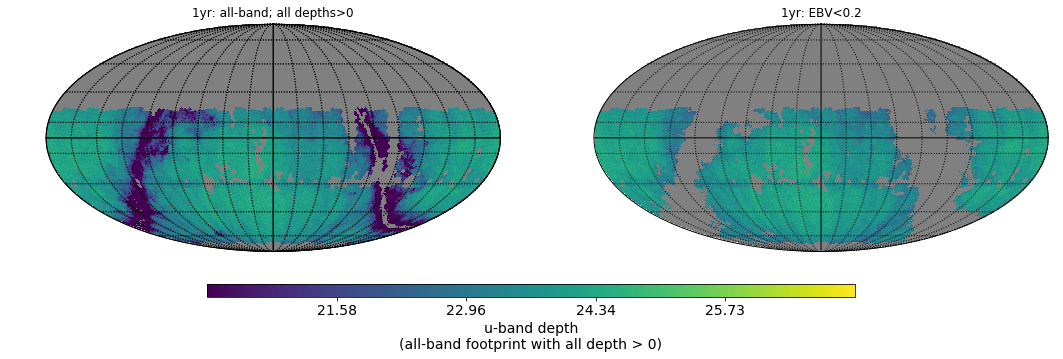

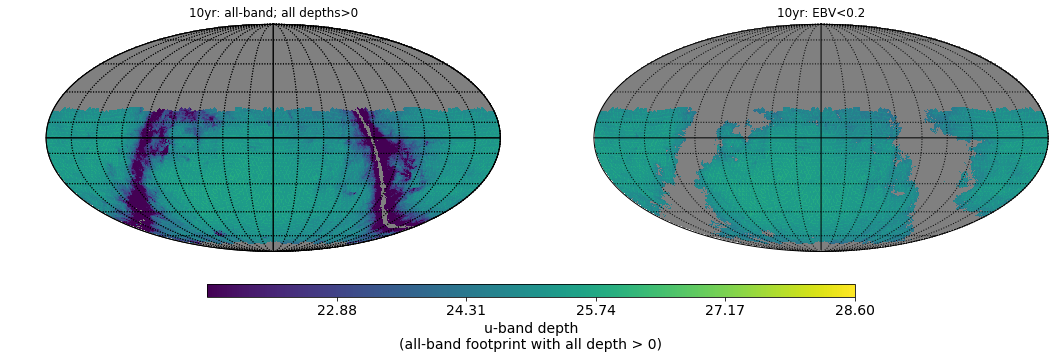

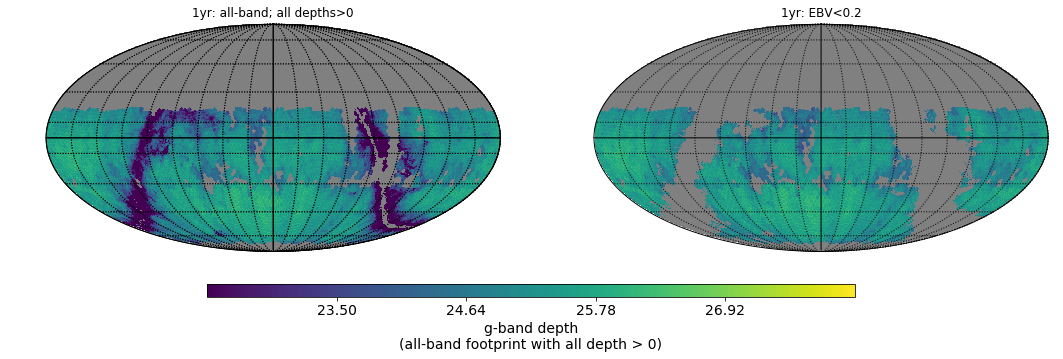

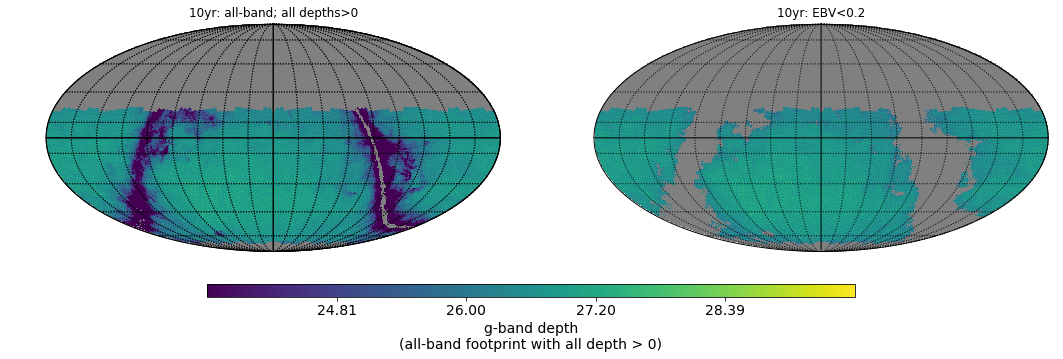

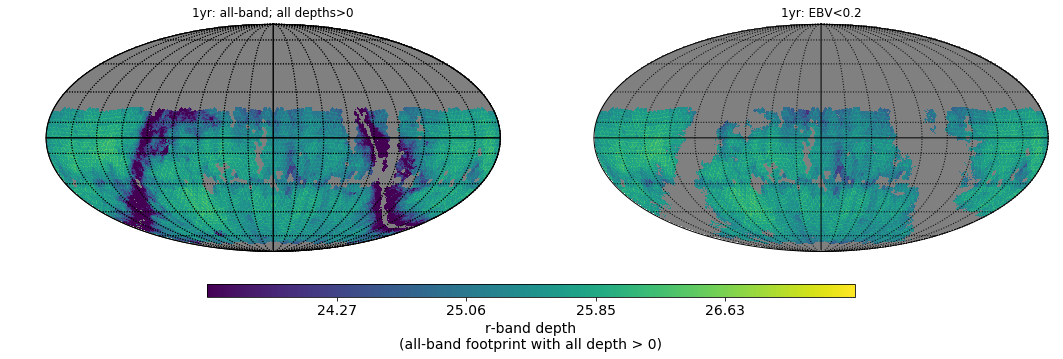

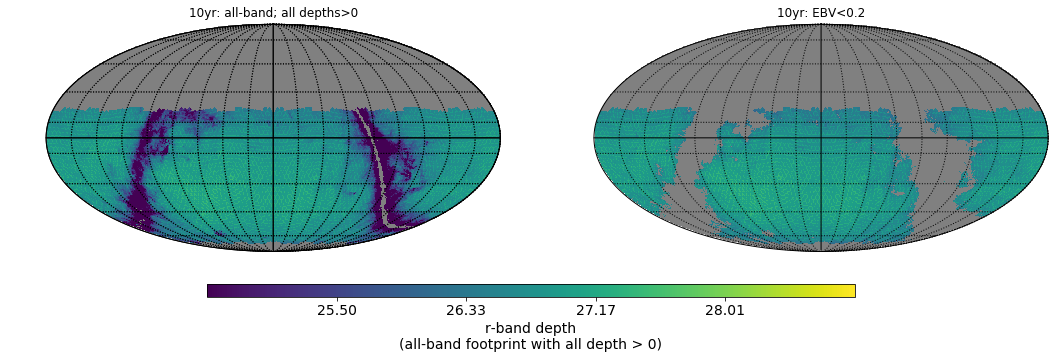

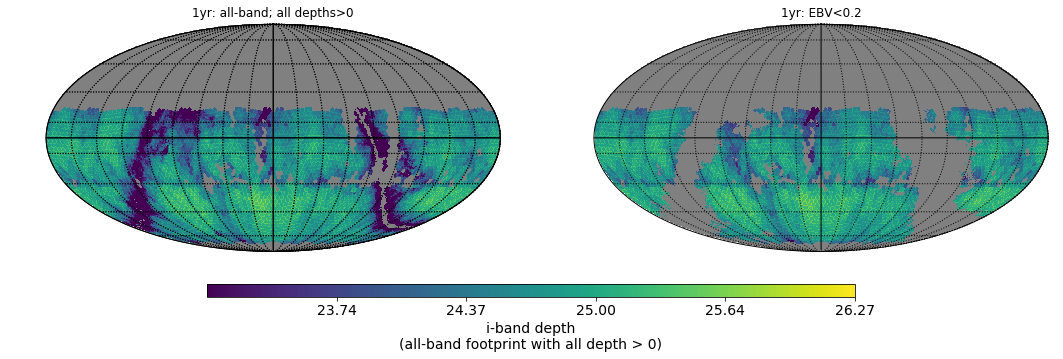

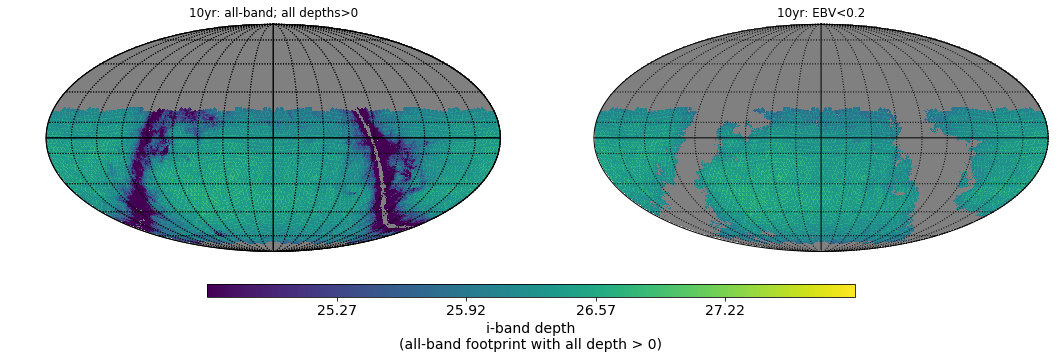

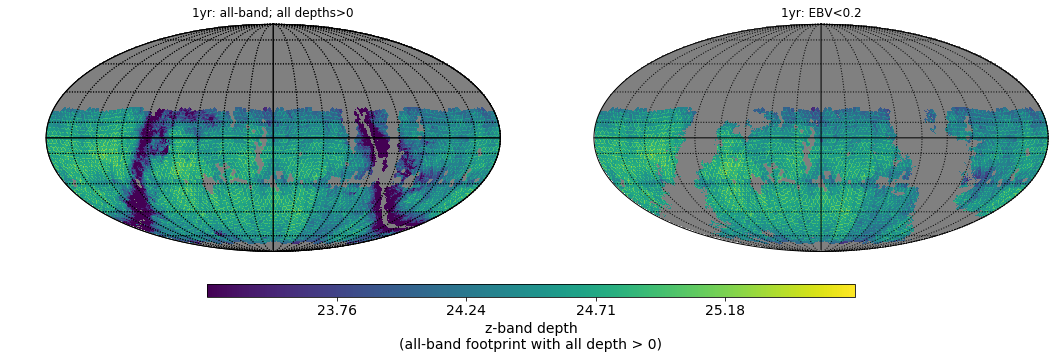

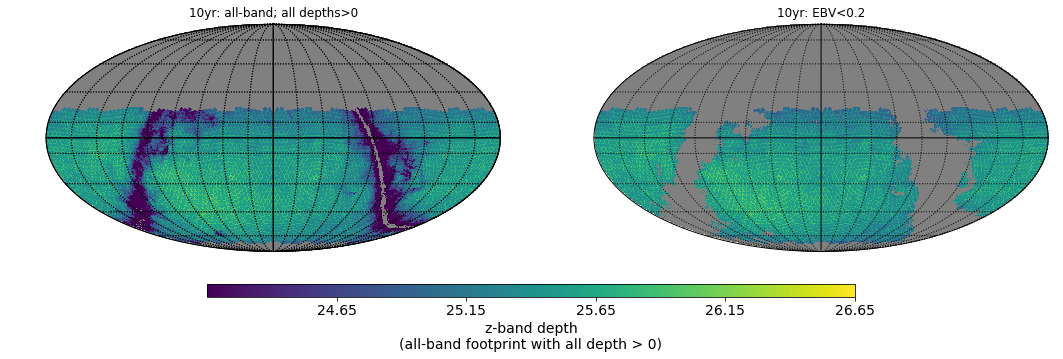

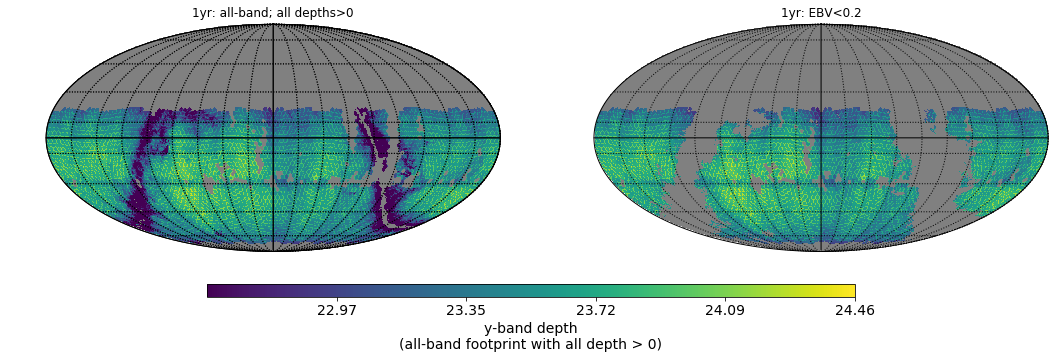

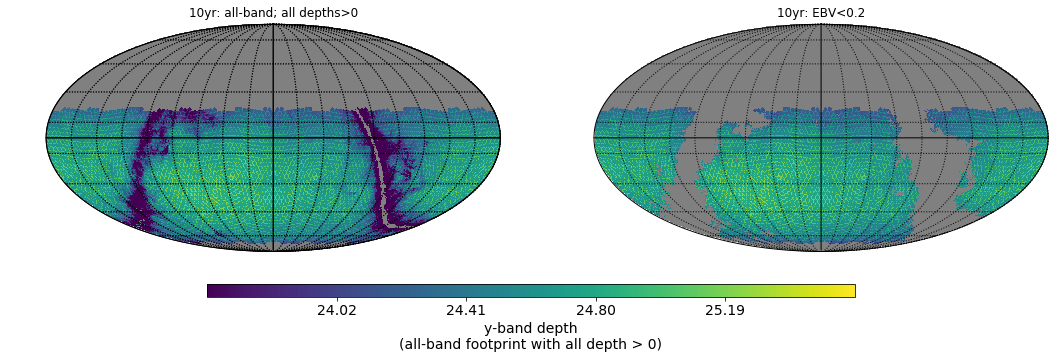


## Saved 10yrFootprint_pontus_2002_nside256_NoDither_ebv<0.2.pickle in /global/homes/a/awan/desc/wfd_footprint/.

CPU times: user 6min 20s, sys: 34 s, total: 6min 54s
Wall time: 7min 1s


In [4]:
%%time
%run implement_ebv_cut_only.py --coadd_data_dir='/global/cscratch1/sd/awan/lsst_output/coadd_output_noDith/' \
                                --save_pixels_fIDs --outDir='/global/homes/a/awan/desc/wfd_footprint/'

Okay good, we do not see the shallow-border and the EBV cut is working.

**Read in the saved pixel number (+ fieldID) array to ensure things are working.**

Reading in 10yrFootprint_pontus_2002_nside256_NoDither_ebv<0.2.pickle
pixNum 384774
fieldIDs 2816


/global/common/software/lsst/cori-haswell-gcc/stack/w.2018.26_sim2.9.0/stack/miniconda3-4.3.21-10a4fa6/Linux64/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-linux-x86_64.egg/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/global/common/software/lsst/common/miniconda/py3-4.3.21-env/lib/python3.6/site-packages/numpy/ma/core.py:2344: RuntimeWarning: invalid value encountered in less_equal
  mabs(xnew - value), atol + rtol * mabs(value))
/global/common/software/lsst/cori-haswell-gcc/stack/w.2018.26_sim2.9.0/stack/miniconda3-4.3.21-10a4fa6/Linux64/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-linux-x86_64.egg/healpy/projaxes.py:1049: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/global/common/software/lsst/cori-haswell-gcc/stack/w.2018.26_sim2.9.0/stack/miniconda3-4.3.21-10a4fa6/Linux64/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.

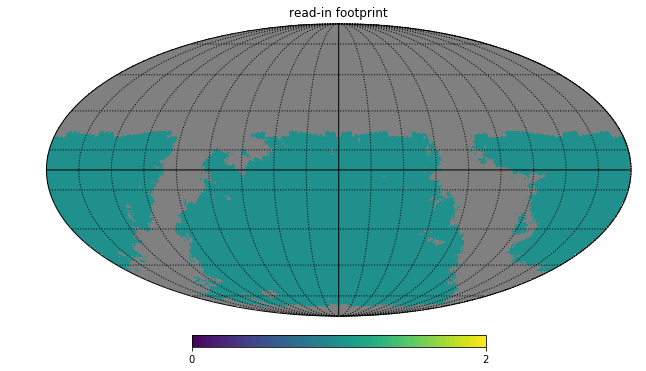

In [5]:
import pickle
import healpy as hp
import numpy as np

outDir = '/global/homes/a/awan/desc/wfd_footprint/'
files = ['10yrFootprint_pontus_2002_nside256_NoDither_ebv<0.2.pickle']
for file in files:
    print('Reading in %s'%file)
    with open('%s/%s'%(outDir, file), "rb") as input_file:
        saved_data = pickle.load(input_file)
    for key in saved_data: print(key, len(saved_data[key]))
        
    nside = 256
    nPix = hp.nside2npix(nside)
    
    val = np.zeros(nPix)+1.
    footprint = val.view(np.ma.MaskedArray)
    footprint.mask =  [True]*nPix
    footprint.mask[saved_data['pixNum']]= False
    footprint.fill_value = np.nan

    plt.clf()
    hp.mollview(footprint, flip='astro', rot=(0,0,0), title='read-in footprint')
    hp.graticule(dpar=20, dmer=20, verbose=False)
    plt.show()